In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

##### Dataset information

 - gender : sex of patients -> (Male/female)
 - smoking_history :  (never, No info, current)
 - hypertension:(NO: 0, Yes: 1)
 - heart_disease:(NO: 0, Yes: 1)
 - age
 - bmi (body mass index)
 - HbA1c_level (Hemoglobin A1c level)
 - blood_glucose_level
 - Target Variable:Diabetes

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##### There are no missing values in the data set

In [6]:
df.duplicated().sum()

3854

##### There are 3854 duplicates values in the data set

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [9]:
# Check statistics of data set
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


##### Insight
 - From above description of numerical data,blood glucose level have the highest mean,follow by age, bmi and HbA1c_level. Other features have mean that is less than one.
 - All standard deviations are not close - between 40.7 and 0.03;
 - While there is a minimum value 0 for hypertension, heart_disease, the minimum value for blood_glucose_level is 80

In [10]:
# unique value of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


After looking at the default data type above we adjusted them so that predictors such as age and 
blood_glucose_level appears properly.

In [11]:
df['age'] = df['age'].astype(int)

#### Exploring Data

In [12]:
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'smoking_history' variable:  ",end=" ")
print(df['smoking_history'].unique())



Categories in 'gender' variable:      ['Female' 'Male' 'Other']
Categories in 'smoking_history' variable:   ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 7 numerical features : ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

We have 2 categorical features : ['gender', 'smoking_history']


#### Exploring Data ( Visualization )
 - Histogram

#####  Histogram 

<AxesSubplot:>

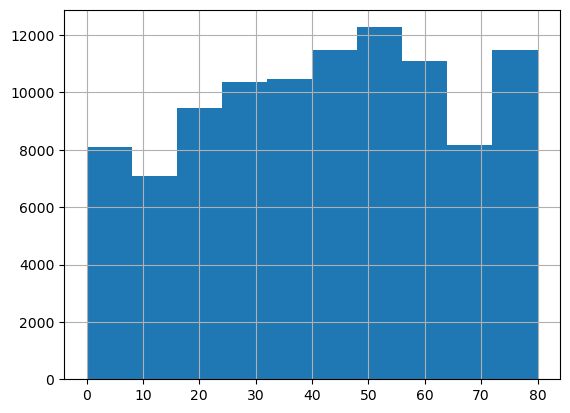

In [16]:
df['age'].hist() 

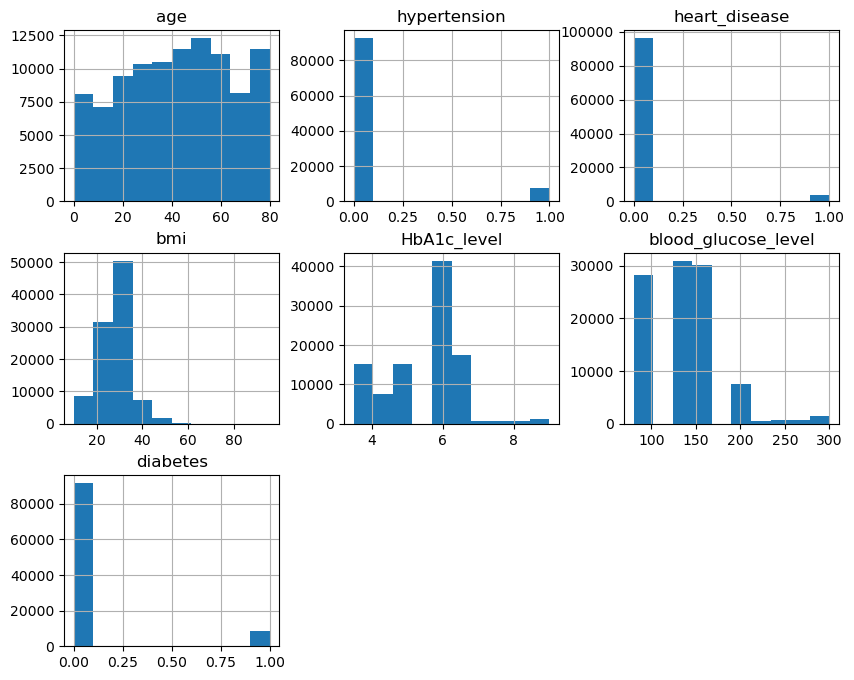

In [17]:
df.hist(bins=10, figsize=(10,8))
plt.show()

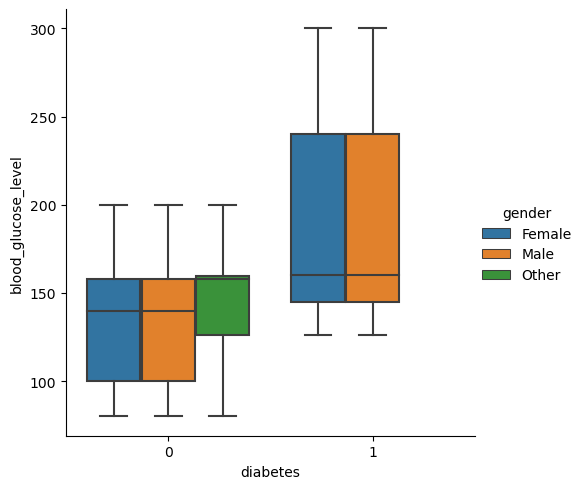

In [18]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

 - Box Plot for Diabetes Vs Blood Glucose Level seems same for all the genders.
 - Other Gender looks different in first glance but it can be due to the reason that only 18 entries were availaible for them in the dataset.

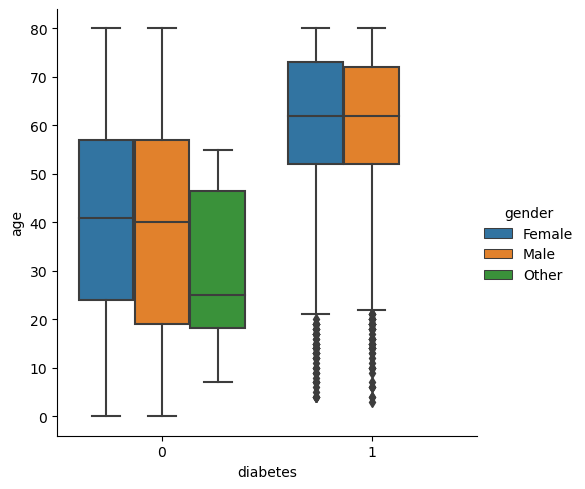

In [30]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

Hypertension Vs Age boxplot based on the Gender appear similar to the Diabetes Vs Age, which was expected because generally most patients for Diabetes have high Median age and around age the likelihood of the Hypertension also increase naturally. Age can be called as a confounding factor here.

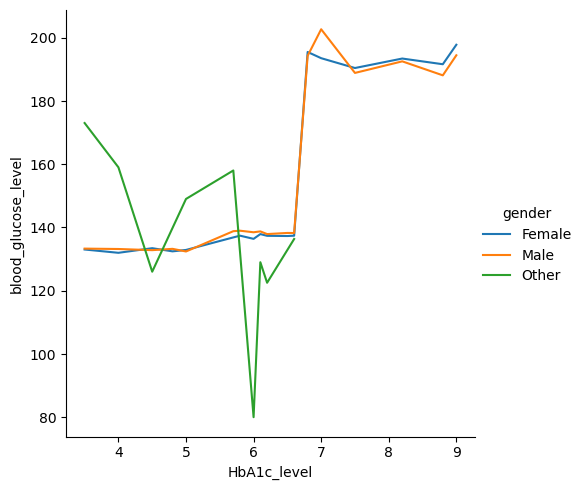

In [31]:
sns.relplot(data = df, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

HbA1c Level and Blood Glucose Level for both Male and Female gender appears same. While other gender may look like that it has different shape it may be due to the fact that only 18 observations of such types were recorded.

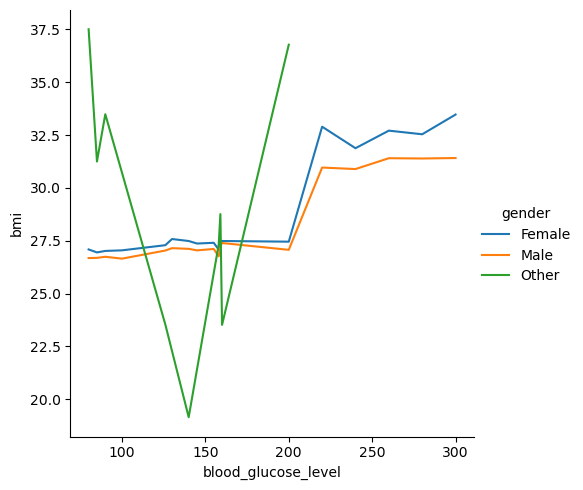

In [32]:
sns.relplot(data = df, x = 'blood_glucose_level', y =  'bmi', kind = 'line', hue = 'gender', ci = None)
plt.show()

BMI for Female appears to be more than Male for each level of blood_glucose_level.

Again we got abnormal result for Others. This may be due to the fact that only 18 observations were recorded representing them.

In [33]:
df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


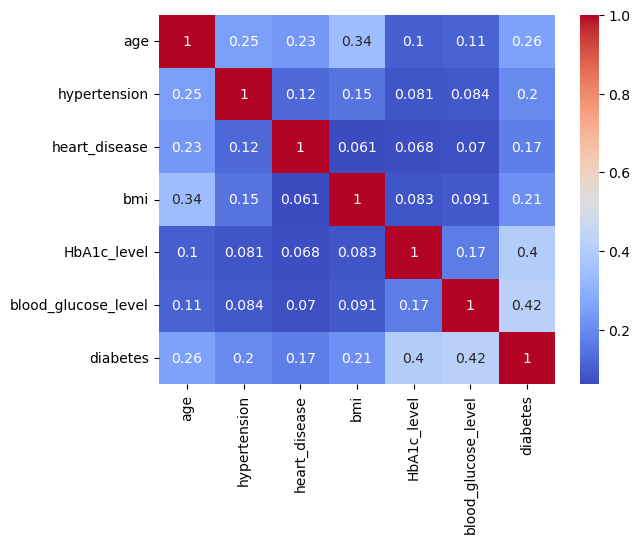

In [34]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') 
plt.show()

We can see that there does not exist an evidence for collinearity from the heatmap.

Although multicollinearity is possible, finding it would require the help of a subject matter expert because our current data set does not contain any high correlation—that is, a correlation of > 0.7—that would allow us to detect collinearity.

Overall there seems no correlations across the predictors and we can use the data for various models

#### Data Cleaning

In [35]:
## check for duplicate rows and drop
df.drop_duplicates(inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36,0,0,No Info,24.60,4.8,145,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [36]:
df.shape

(96112, 9)

In [37]:
df = df.drop(columns = 'smoking_history')

In [38]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140,0
1,Female,54,0,0,27.32,6.6,80,0
2,Male,28,0,0,27.32,5.7,158,0
3,Female,36,0,0,23.45,5.0,155,0
4,Male,76,1,1,20.14,4.8,155,0


In [39]:
## blood_glucose_level is a continuous variable, and thus it was converted into float.
df['blood_glucose_level'] =  df['blood_glucose_level'].astype(float)

In [40]:
## Age is a discrete variable here, hence we converted it into int type convert
df['age'] = df['age'].astype(int)


#### Data Analysis and preprocessing

#### Data Analysis For Gender

In [42]:
gender=df['gender'].value_counts()
gender

Female    56142
Male      39952
Other        18
Name: gender, dtype: int64

In [44]:
## Do Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])


In [45]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,25.19,6.6,140.0,0
1,0,54,0,0,27.32,6.6,80.0,0
2,1,28,0,0,27.32,5.7,158.0,0
3,0,36,0,0,23.45,5.0,155.0,0
4,1,76,1,1,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...
99994,0,36,0,0,24.60,4.8,145.0,0
99996,0,2,0,0,17.37,6.5,100.0,0
99997,1,66,0,0,27.83,5.7,155.0,0
99998,0,24,0,0,35.42,4.0,100.0,0
